# Introduction to R: Part 2
##### <font color=gray>Statistical Consulting Center| University of North Carolina at Greensboro </span>

## Generating data and simulation

In research settings, it is often desired to generate data with known characteristics in order to "test" the performance of methods. 
*Monte Carlo* methods generally refer to simulation techniques when sampling repeatedly from a known probability distribution. 
  

### Example: Testing the Central Limit Theorem.   
The CLT states that the sampling distribution of the sample mean, $\bar{X}$, becomes normal as the sample size, $n$, becomes large. More precisely, that  
$Z_{n}=\frac{\bar{X_n}-\mu}{\sigma /\sqrt{n}}\rightarrow N(0,1)$ as $n\rightarrow \infty.$   

However, what about finite $n$?    
We can simulate sampling from theoretical distributions and "check" if the approximation is sufficient.  

We illustrate several new functions for carrying out the simulation.  

- `set.seed()`: begins the random number generation algorithm at a specific starting point. The same set of numbers will be generated each time.
- `numeric()`: creates a vector, *z*, of a specified size to hold results.
- `for{}`: repeatedly performs a calculation a specified number of times.
- `rnorm()`: generates a random sample of size $n=10$ from a normal distribution with mean 20 and standard deviation 3.  

In [1]:
#Normal distribution
set.seed(4123)
z <- numeric(10000)
for (i in 1:10000) {
x <- rnorm(10,mean=20, sd=3)
z[i] <- (mean(x)-20)*sqrt(10)/3
}

We can construct a histogram with normal curve superimposed to check the fit:  

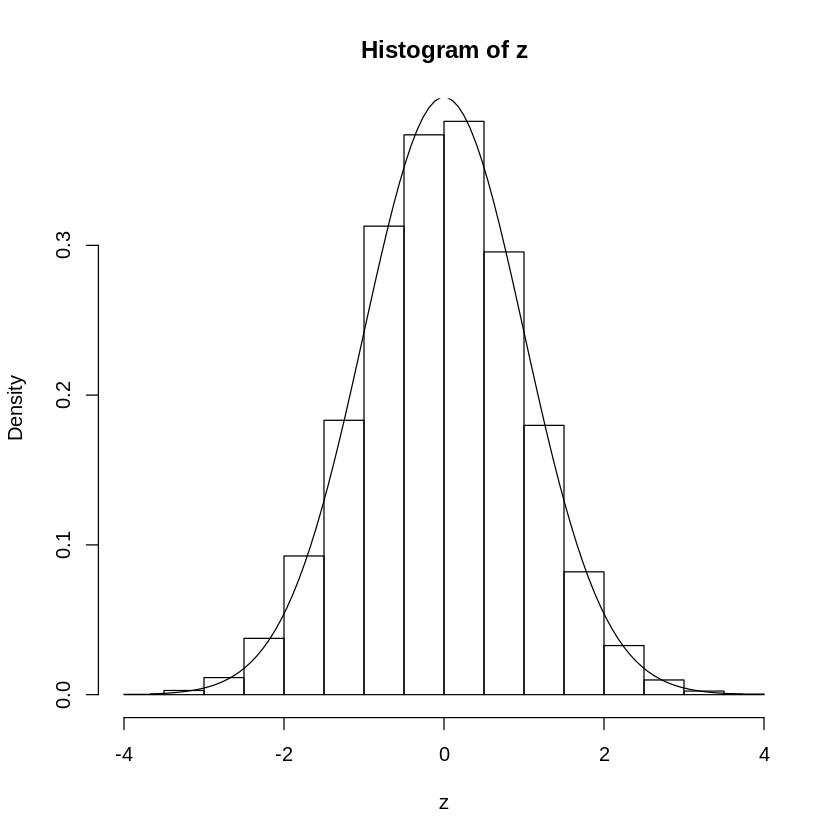

In [2]:
hist(z, freq=F)
curve(dnorm(x),from=min(z),to=max(z), add=T)

R contains many built-in functions for sampling from known probability distributions. The code below used `rexp()` to generate a random sample of size $n=100$ from an exponential distribution with mean 20.  

In [3]:
#Exponential distribution
set.seed(4123)
z <- numeric(10000)
for (i in 1:10000) {
x <- rexp(100,rate=1/20)
z[i] <- (mean(x)-20)*sqrt(100)/20
}

Again, we construct a histogram with normal curve superimposed to check the fit:  

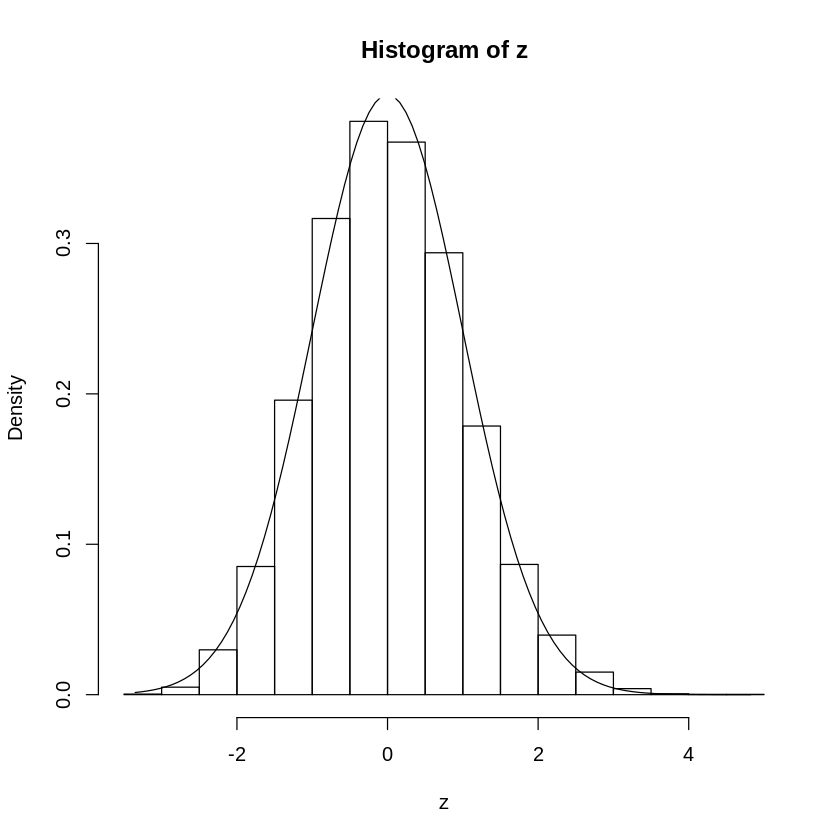

In [4]:
hist(z, freq=F)
curve(dnorm(x),from=min(z),to=max(z), add=T)

### Basic Monte Carlo Estimation  
Suppose we wish to investigate the properties of an estimator whose theoretical properties are unknown. In general, we are interested in the mean, standard deviation and probability distribution.  
These can all be estimated by simulation for any sample statistic.  
  
***
#### **Example 7.1.**  
Take a random sample of size $n=2$ from a $N(0,1)$ distribution, and compute the statistic $|X_{1}-X_{2}|$. We wish to estimate $\theta=\mu=E(|X_{1}-X_{2}|).$  
We can simulate repeated samples from a $N(0,1)$ distribution and compute an estimate, $\hat\theta$ of $\theta.$  
*Algorithm*:  
1. Generate a random sample of size 2 from a $N(0,1)$ distribution;  
2. Calculate $\hat \theta$;  
3. Repeat *m* times;  
4. Compute estimate of $SE(\hat \theta).$

In [5]:
set.seed(4123)
m <- 1000
g <- numeric(m)
for (i in 1:m) {
  x <- rnorm(2)
  g[i] <- abs(x[1] - x[2])
}
est <- mean(g)
est

[1] 1.150392

***
### Monte Carlo estimator of the standard error of the mean  
$SE(\bar{X})= \sqrt{Var(\bar X)}= \sqrt{Var(X)/n}.$ In general, $Var(X)$ will be unknown, and so we can use the "plug-in" estimator from the sample, in this case the sample variance.  

In [6]:
sqrt(sum((g - mean(g))^2))/m

[1] 0.02687826

### Using MSE to assess precision
For an arbitrary estimator a formula for $Var(\hat \theta)$ may not be known. In that case, the mean square error ($MSE$) can be calculated as a substitute.  
"Recall" that $MSE(\hat\theta)=E[(\hat\theta-\theta)^2]=Var(\hat\theta)-[bias(\hat\theta)]^2.$  
The Monte Carlo estimator of $MSE(\hat \theta)$ is $\widehat{MSE}=\frac{1}{m} \sum_{j=1}^m (\hat \theta^{(j)}-\theta)^2,$ where $\hat \theta^{(j)}$ is calculated on the $j^{th}$ Monte Carlo sample.  
*Algorithm*: See p.186. 
***
#### **Example 7.2.**

In [7]:
set.seed(4123)
n <- 20
m <- 1000
tmean <- numeric(m)
for (i in 1:m) {
  x <- sort(rnorm(n))
  tmean[i] <- sum(x[2:(n-1)]) / (n-2)
}
mse <- mean(tmean^2)
mse
sqrt(sum((tmean - mean(tmean))^2)) / m    #se

n <- 20
m <- 1000
tmean <- numeric(m)
for (i in 1:m) {
  x <- sort(rnorm(n))
  tmean[i] <- median(x)
}
mse <- mean(tmean^2)
mse
sqrt(sum((tmean - mean(tmean))^2)) / m 

[1] 0.05475957

[1] 0.007381992

[1] 0.07767015

[1] 0.008789279

# Try Yourself
If you would like to try something by yourself, you can always click the `+` button on the menu bar to add more cells and start typing.